In [107]:
!pip install numpy matplotlib scikit-learn seaborn pandas

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [109]:
# Dataset Iris
iris = datasets.load_iris() # carga datset
df = pd.DataFrame(iris.data, columns=iris.feature_names) # dataframe
df['target'] = iris.target # añade la variable objetivo

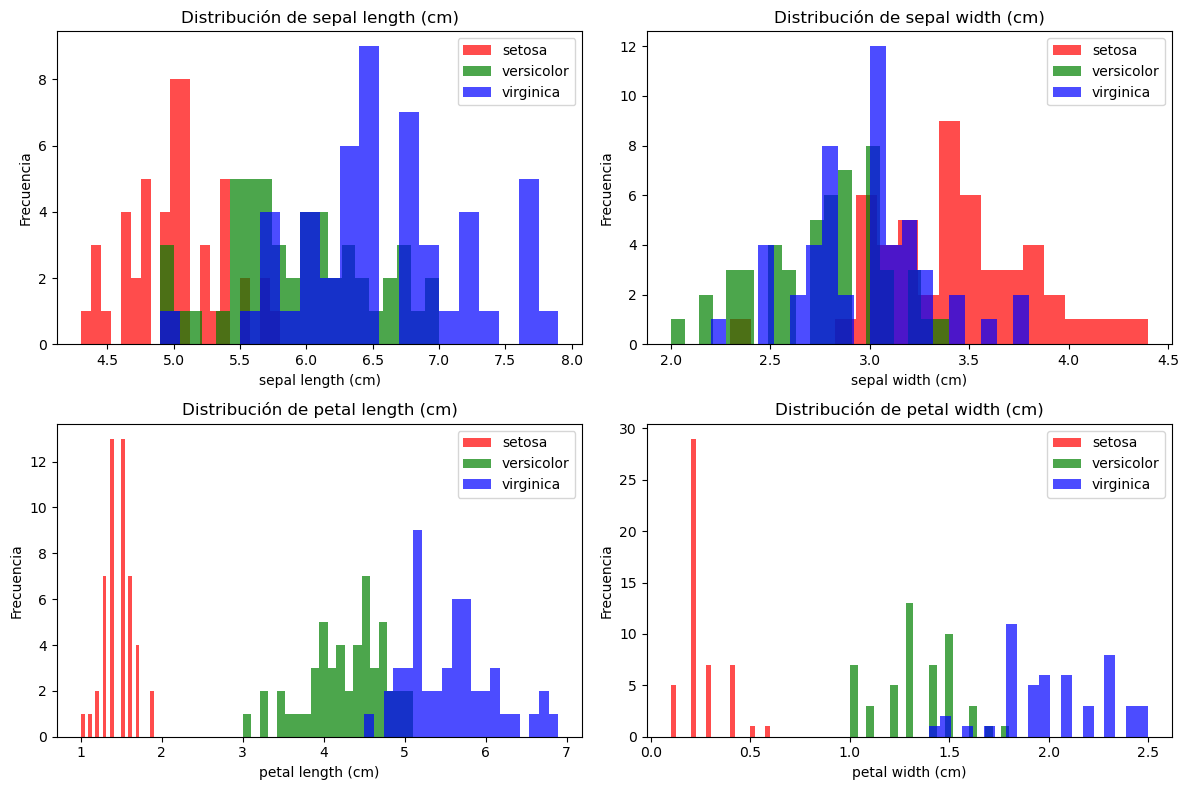

In [110]:
# Graficar la distribución de los datos diferenciando por clases de flor
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue']  # Colores para cada clase
classes = iris.target_names  # Nombres de las clases
features = df.columns.drop('target')  # columnas a normalizar

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    for target_class in range(len(classes)):
        subset = df[df['target'] == target_class]
        plt.hist(subset[feature], bins=20, color=colors[target_class], alpha=0.7, label=classes[target_class])
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()

In [111]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [112]:
## Eliminamos sepal_width (variable menos relevante)
df.drop(columns=['sepal width (cm)'], inplace=True)

In [ ]:
df.isnull().sum() # comprobamos si hay valores nulos

sepal length (cm)    0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [114]:
## Normaliza con MinMaxScaler SOLO las características (excluyendo 'target')
scaler = MinMaxScaler()
features = df.columns.drop('target')  # columnas a normalizar
df_scaled = df.copy()  # copia del DataFrame original
df_scaled[features] = scaler.fit_transform(df[features])  # normaliza solo features

In [115]:
df_scaled.head()

,sepal length (cm),petal length (cm),petal width (cm),target
0,0.222222,0.067797,0.041667,0
1,0.166667,0.067797,0.041667,0
2,0.111111,0.050847,0.041667,0
3,0.083333,0.084746,0.041667,0
4,0.194444,0.067797,0.041667,0


In [116]:
df_scaled.isnull().sum() # comprobamos si hay valores nulos

sepal length (cm)    0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [117]:
df_scaled.shape

(150, 4)

In [118]:
df_scaled.dtypes

sepal length (cm)    float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [119]:
df_scaled.describe()

,sepal length (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.467458,0.458056,1.000000
std,0.230018,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.101695,0.083333,0.000000
50%,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,2.000000


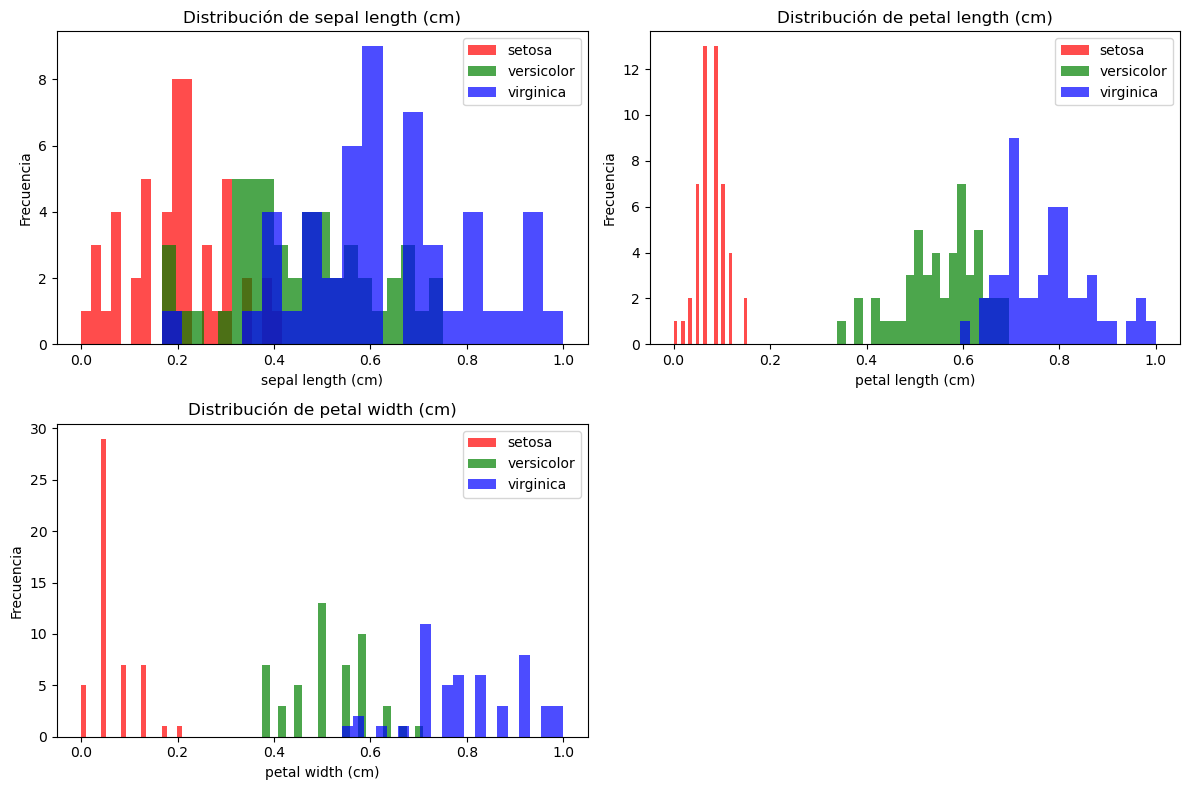

In [120]:
# Graficar la distribución de los datos diferenciando por clases de flor
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue']  # Colores para cada clase
classes = iris.target_names  # Nombres de las clases

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    for target_class in range(len(classes)):
        subset = df_scaled[df_scaled['target'] == target_class]
        plt.hist(subset[feature], bins=20, color=colors[target_class], alpha=0.7, label=classes[target_class])
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()